In [1]:

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession


In [2]:
df = pd.read_csv('Crop_recommendation.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [3]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [4]:
value = df['label'].nunique()
value
# There are a total of 22 options of crops for farmers to grow

22

In [5]:
different_crops = df['label'].unique()
different_crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

<AxesSubplot:xlabel='temperature', ylabel='ph'>

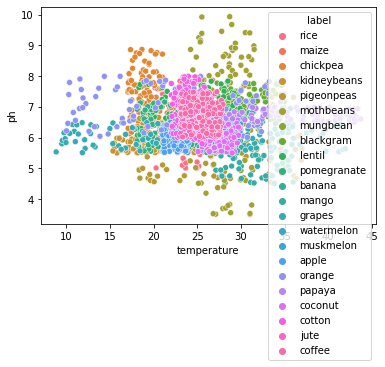

In [6]:
sns.scatterplot(x='temperature',y='ph',data=df,hue='label')

In [7]:
spark = SparkSession.builder.appName('TARP PROJECT').getOrCreate()
spark

In [8]:
df_spark = spark.read.csv('Crop_recommendation.csv',header=True,inferSchema=True)


In [9]:
mean_df = df_spark.groupBy('label').mean()
mean_df.show()

+-----------+------+------+------+------------------+------------------+------------------+------------------+
|      label|avg(N)|avg(P)|avg(K)|  avg(temperature)|     avg(humidity)|           avg(ph)|     avg(rainfall)|
+-----------+------+------+------+------------------+------------------+------------------+------------------+
|   chickpea| 40.09| 67.79| 79.92|18.872846751900003|     16.8604394237|     7.33695662374|     80.0589772605|
|   mungbean| 20.99| 47.28| 19.87|28.525774735299997| 85.49997454300001| 6.723956940370001| 48.40360090290002|
|     orange| 19.58| 16.55| 10.01|22.765725496699996| 92.17020876340004|     7.01695745276|110.47496871999998|
|     papaya| 49.88| 59.05| 50.04|     33.7238587388| 92.40338768259998|     6.74144237274|142.62783886290003|
| pigeonpeas| 20.73| 67.73| 20.29|27.741762225899997| 48.06163308470001| 5.794174879790002|149.45756381350003|
|     cotton|117.77| 46.24| 19.56|23.988957895200016| 79.84347425379998|     6.91267549578| 80.39804311930001|
|

In [10]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="label",outputCol="label_Index")
df_r = indexer.fit(df_spark).transform(df_spark)
df_r.select(["label","label_Index"]).distinct().show()
# We have got 22 distinct values and each crop corresponds to a certain value as shown in the below table.
# This will be useful for un while perfotrming the analysis.

+-----------+-----------+
|      label|label_Index|
+-----------+-----------+
|     grapes|        7.0|
| pigeonpeas|       18.0|
|     orange|       16.0|
|   chickpea|        3.0|
|    coconut|        4.0|
|      mango|       12.0|
|     lentil|       10.0|
|       jute|        8.0|
|      apple|        0.0|
| watermelon|       21.0|
|  muskmelon|       15.0|
|     banana|        1.0|
|     coffee|        5.0|
|  blackgram|        2.0|
|       rice|       20.0|
|   mungbean|       14.0|
|kidneybeans|        9.0|
|     papaya|       17.0|
|     cotton|        6.0|
|  mothbeans|       13.0|
+-----------+-----------+
only showing top 20 rows



In [11]:
df = df_r.toPandas()
df

,N,P,K,temperature,humidity,ph,rainfall,label,label_Index
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5.0


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Importing all the libraries required for the predictive analytics

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int32  
 1   P            2200 non-null   int32  
 2   K            2200 non-null   int32  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
 8   label_Index  2200 non-null   float64
dtypes: float64(5), int32(3), object(1)
memory usage: 129.0+ KB


In [26]:
x = df.drop(['N','P','K','label'],axis=1)
y=df.drop(['temperature','humidity','ph','rainfall','label_Index','label'],axis=1)
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2)
model=DecisionTreeClassifier()
model.fit(X_train,Y_train)

prediction = model.predict([[20.87,82.002,6.502,202.93,20]])
print(prediction)


[[90 42 43]]


<AxesSubplot:xlabel='avg(humidity)', ylabel='label'>

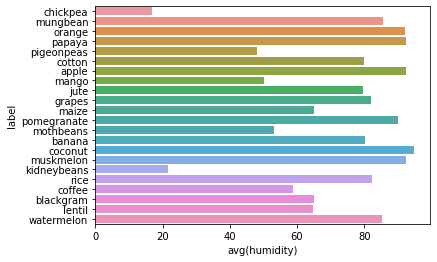

In [32]:
df_mean = mean_df.toPandas()
sns.barplot(x='avg(humidity)',y='label',data=df_mean)
# Plotting average level of Nitrogen required by each crop

<AxesSubplot:xlabel='avg(temperature)', ylabel='label'>

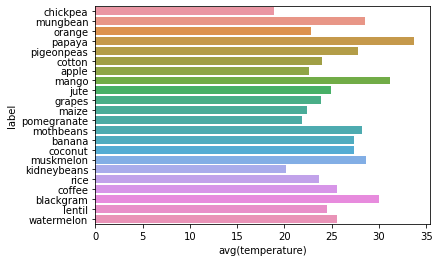

In [31]:
sns.barplot(x='avg(temperature)',y='label',data=df_mean)
# Average Phosphorus content required 

<AxesSubplot:xlabel='avg(ph)', ylabel='label'>

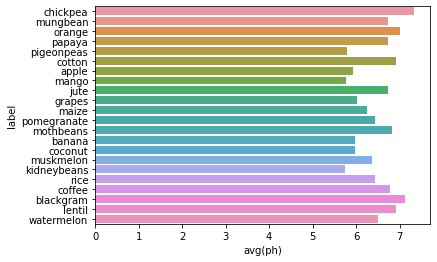

In [33]:
sns.barplot(x='avg(ph)',y='label',data=df_mean)